# Homework #3
**Due:** Thursday January 25th, 11:59PM via Blackboard

**Name:** **Anish Doshi**,  **Student Id:** **ap2326**

## Problem 1.  Forward Table Entry via REST API (20 pts)
In this problem *you* will be the *control plane* for a network of hosts interconnected by SDN switches. You will use the simplest command possible to obtain general connectivity amongst the hosts (not necessarily very efficient). For this problem you will need:

1. Mininet VM. You will create "linear" topology network consisting of *n* > 2 switches with *m* > 1 hosts per switch with each switch connected to one other switch in a linear chain. Use a command similar to this on the Mininet VM: `sudo mn --topo linear,3,2 --controller=remote,ip=192.168.1.213` where `n=3` switches in the above and `n=2` and the *IP* address above is the address where I run the Python Ryu controller software (I use my host computer and not the VM). Pick numbers less than 10 for *n* and *m* you only have to program three switches if you don't want to write more general code.

2. You need to install the [Ryu SDN controller software](https://osrg.github.io/ryu/) into your Python 3.6 system. This can be done by running `pip install ryu`.

3. Run the *ryu.app.ofctl_rest* application on the host machine (the machine where you install Ryu) via the command `ryu-manager ryu.app.ofctl_rest`. You should be able to talk to this REST interface at 127.0.0.1:8080.  See the [Ryu REST API](http://ryu.readthedocs.io/en/latest/app/ofctl_rest.html) for syntax and endpoints of API calls.

4. If it is not installed in your Python distribution (it is in Anaconda) install the Python [Requests](http://docs.python-requests.org/en/master/) package. We'll use to make calls (HTTP GET/POST requests) to the REST interface of step 3.

**(a)** Capture the screen shot of Mininet creating your network in step 1. Mine looks like:
![Mininet network creation](MiniLinear.png)

**(b)** Point a browser to the following pages: (i) http://127.0.0.1:8080/switches (ii) http://127.0.0.1:8080/stats/desc/1 (iii) http://127.0.0.1:8080/stats/portdesc/1  What is this stuff? Copy and paste the text from the web pages below.

**(c)** Choose a switch and try a *ping* between two hosts connected to that switch via the Mininet console. Capture a screen shot. Mine looks like: ![Ping test 1](pingTest1.png)

**(d)** Turn that switch into an Ethernet *Hub* (which just floods packets it receives on one port out all other ports) with a single forwarding table entry that your create via the REST interface.  I used the Python code below for my switch *s7*

In [2]:
# Try adding a flow entry to flood packets
import requests
msg = {  # Forwarding table entry and switch information
    "dpid": 7,   # Switch number here
    "cookie": 1,
    "cookie_mask": 1,
    "table_id": 0,
    "idle_timeout": 0,  # Doesn't idle time out
    "hard_timeout": 0,  # Doesn't hard time out
    "priority": 11111,
    "flags": 1,
    "match":{ # Matches anything packet arriving on any port
    },
    "actions":[
        {
            "type":"OUTPUT",
            "port": "OFPP_FLOOD" # Floods out of all the ports except what it came in on
        }
    ]
 }
r = requests.post("http://127.0.0.1:8080/stats/flowentry/add", json=msg)  
print(f"status code: {r.status_code}, response: {r.text}")

status code: 200, response: 


show me the results of your *ping* test. Mine was:
```
mininet> h1s7 ping -c2 h5s7
PING 10.0.0.43 (10.0.0.43) 56(84) bytes of data.
64 bytes from 10.0.0.43: icmp_seq=1 ttl=64 time=0.251 ms
64 bytes from 10.0.0.43: icmp_seq=2 ttl=64 time=0.083 ms

--- 10.0.0.43 ping statistics ---
2 packets transmitted, 2 received, 0% packet loss, time 1002ms
rtt min/avg/max/mdev = 0.083/0.167/0.251/0.084 ms
```
**(e)** Add table entries to other switches so that you can test connectivity and forwarding performance for two hosts that are at least 2 switch hops away from each other.  Show your code below and show a screen show of your *iperf* performance. My *ping* and *iperf* results looked like the following: ![iperf](MiniIperf.png)


A.1a. Scrrenshot of mininet creating network from step1: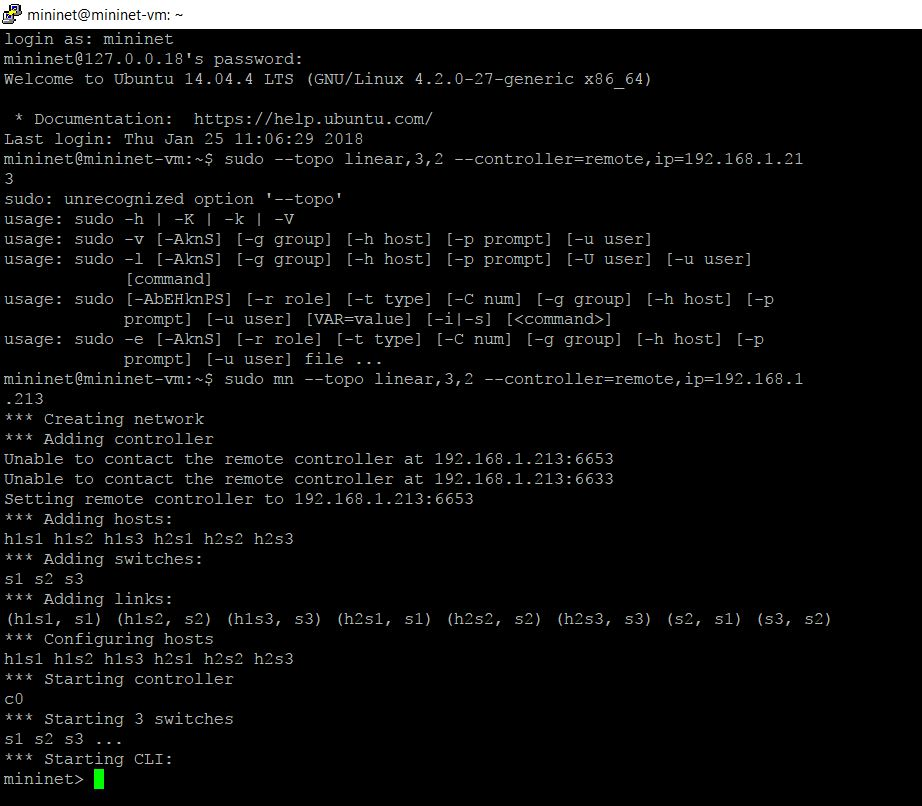

A.1b. Getting 404, page not found error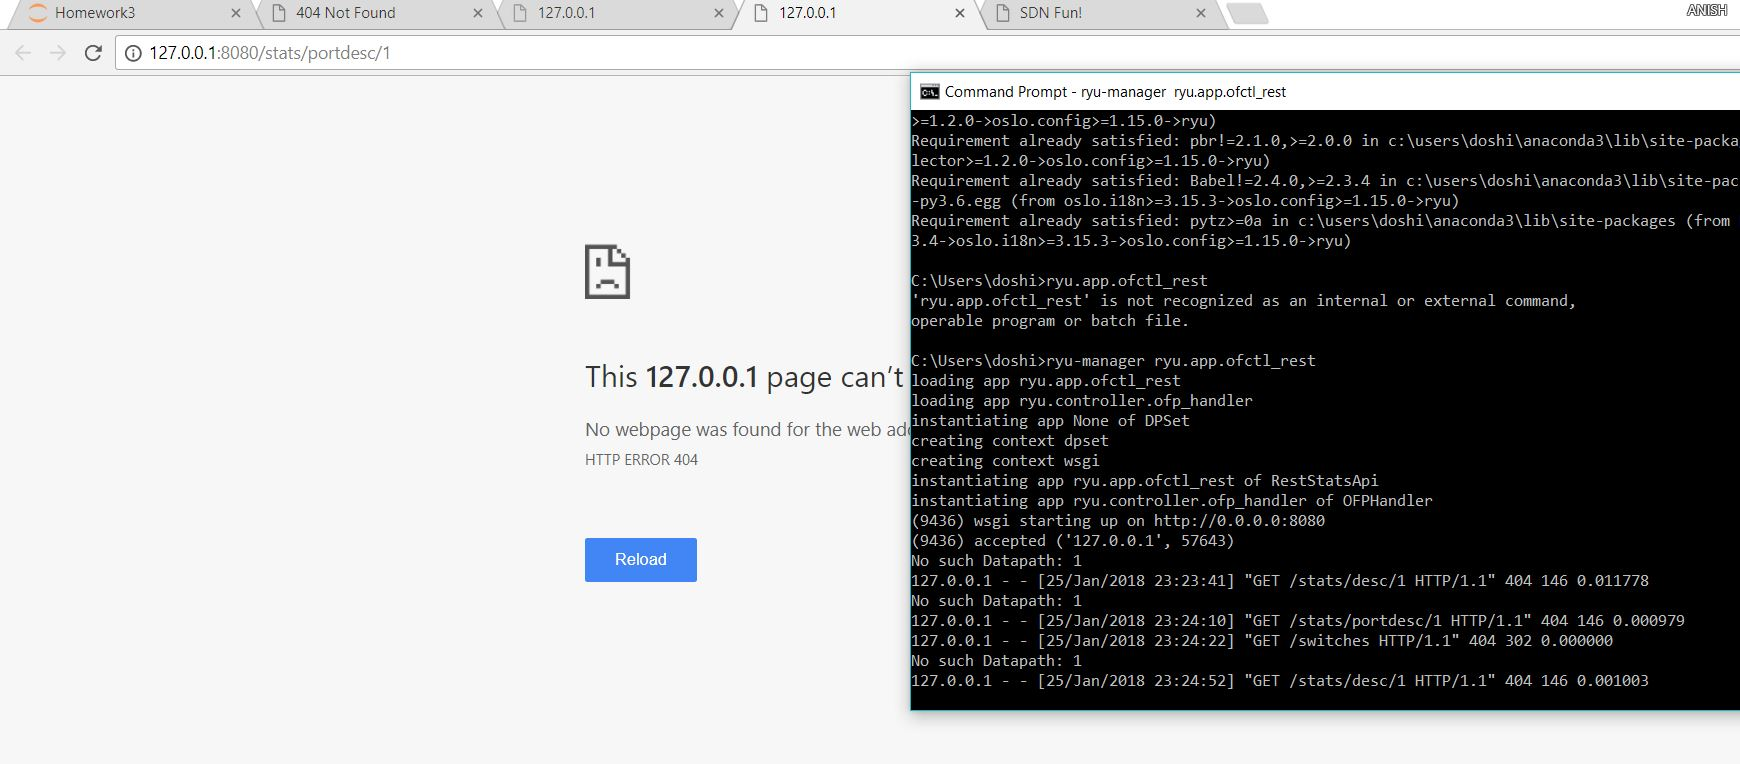.  You didn't get the Ryu application running. -5.

A.1c. Here is screenshot of ping test between same switch with two different hosts: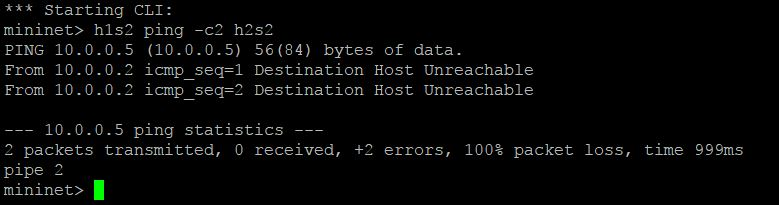

A.1d. Turning switch into an Ethernet Hub with a single forwarding table entry :
**Didn't get the Ryu application running -5**

In [1]:
# Try adding a flow entry to flood packets
import requests
msg = {  # Forwarding table entry and switch information
    "dpid": 2,   # Switch number here
    "cookie": 1,
    "cookie_mask": 1,
    "table_id": 0,
    "idle_timeout": 0,  # Doesn't idle time out
    "hard_timeout": 0,  # Doesn't hard time out
    "priority": 11111,
    "flags": 1,
    "match":{ # Matches anything packet arriving on any port
    },
    "actions":[
        {
            "type":"OUTPUT",
            "port": "OFPP_FLOOD" # Floods out of all the ports except what it came in on
        }
    ]
 }
r = requests.post("http://127.0.0.1:8080/stats/flowentry/add", json=msg)  
print(f"status code: {r.status_code}, response: {r.text}")

status code: 404, response: 


A.1e. 

## Problem 2. VLAN Emulation in Mininet (20 pts)
In this problem you will bring to bring to life the VLAN you designed in Homework #2 problem 5.  However you will need to modify your network so that it has a *tree* topology, i.e., no loops.  You will need the following software and to perform the following steps.

1. Make sure that your VLAN (*tree*) network has *ports*, *IP addresses*, and *Ethernet addresses* assigned. *ComNetVis* has tools under the network Menu to help you do this.  Make sure that your host nodes are assigned to the VLANs that you wanted via the VID given to their nodes.  You will need this JSON file on both the Mininet VM and the host that you run the control software on.

2. On your Mininet VM you will need to install NetworkX (v2.0 or higher). To do this you may first need to install `pip` on your Mininet VM with the command: `sudo apt-get install python-pip`.  After this you can install NetworkX with `sudo pip install networkx`

3. With Ryu installed on the host machine download my VLAN SDN controller software [MultipleSwitchVLANlrn.py](http://www.grotto-networking.com/code/SDNfun/MultipleSwitchVLANlrn.py)  Run this on your host (not the Mininet VM) with the command: `python3 MultipleSwitchVLANlrn.py --netfile=../exampleNets/MultiSwitchVLANNet3.json` (your python command may differ along with the location and name of your network JSON file).

4. You need to transfer my [NetRunnerNS.py](http://www.grotto-networking.com/code/SDNfun/NetRunnerNS.py) file to your Mininet VM along with the JSON file describing your network. This program will build and run your network in Mininet given the JSON.  Run this program with your network on the Mininet VM with the command: `sudo python NetRunnerNS.py -f ./exampleNets/MultiSwitchVLANNet3.json -ip 192.168.1.213` where the IP address is the address of the machine running Ryu and we use the a copy of the same JSON file on the VM that we used with the controller (again use your file name and location).

**(a)** Show me a screen shot of the Mininet window after it has built your VLAN network. Mine looks like ![Mininet VLAN creation](MiniVLAN.png)

**(b)** Show me a screen shot of the Window where you started the `MultipleSwitchVLALlrn.py` code. Mine looks like: ![Ryu VLAN](RyuVLAN.png)

**(c)** Test VLAN functionality by showing a successful *ping* between two hosts on the same VLAN and an unsucceful ping between two hosts on different VLANs.  My example looks like: ![ping on and across VLANs](pingVLAN.png)




## Problem 3.  MPLS (20pts)
**(a)** What are the key operations in the MPLS *data plane*?

**(b)** What are the necessary operations of the MPLS *control* or *management* planes to enable basic MPLS connectivity.

**(c)** How do MPLS *labels* differ from *IP* and *Ethernet* addresses? How unique are MPLS labels?

**(d)** Why/What would anyone use MPLS for?


A.3a. The data plane is the workhorse of the switching elements in our networks. It is also called forwarding plane. It receives input via ports, follow procedure for optional manipulaltions on inputs and then passes to specific output port. **It perform operations such as filtering(?), classifications, label push, label pop and label swap.**

A.3b. The control/management plane fills in the forward table and controls the procedure of the data plane. The key features that enable basic MPLS connectivty are Routing, Path computation, Label distribution. eg.IP Routing, OSPF, L3 switching, BGP, IS-IS.  **The term "Routing" is not precise enough! It can mean many things.**

A.3c. Labels differ with IP and Ethernet addresses in following manner that IP and Ethernet addresses are network-wide unqiue, wheres labels need to be unique on link level only; network-wide they are insignificant. 

A.3d. MPLS is higly used for the following reasons: flexiblity, adaptablity, scalability, it is protocol neutral, it supports metrics. MPLS has a built-in flexiblity. Sepration of control and data plane provides independece amongst each other thus creates alot of flexiblity. It has been able to evolve over time supporting Layer 2, Layer 3, Ethernet services and traffic engineering.  It was designed to support in multiple protocol environment, allowing it to work well with ATM, Frame Relay, Sonet, Ethernet. It allows carriers to gather wide statistical data which can be used for network analysis.  **No, as discussed in class it is used for VPNs and for traffic engineering. -5**

## Problem 4. MPLS Hierarchy and Merging (20 pts)
Since MPLS uses paths for connectivity there is a concern that MPLS would suffer from the $N^2$ *problem*.  We saw in class that there are two techniques to reduce the number of LSPs used in a network (1) label merging, and (2) label hierarchy (also called MPLS tunnels).

**(a)** Under what conditions can *merging* be applied and under what conditions can *tunneling* be applied?

**(b)** Draw an MPLS network broken into at least one core network and two edge networks with sufficient detail to illustrate the concept of tunneling to an undergraduate in networking.  Mine is shown below but just barely illustrates the key points.  Do you need to show hosts? If not leave them off, if so explain why.  The best diagram in class may be used on the midterm. ![MPLS tunnels](MPLSTunnel.png)



A.4a. In a MPLS network, if multiple distinct LSPs terminating at same destination can be clubbed into one LSPs, it is called *label merging*. It takes place when an IP packet travels to terminate at same LSR. Label merging is possible only if LSPs have common destination. In case where LSPs have overlap, *label stacking* is used. This is done to save LSR table entries. Although, number of LSPs can cause connectivity problem; therefore, it is possible to set up tunnels for mostly used paths across the core network and then put the end-to-end LSPs through the appropriate core tunnels.

A.4b. Following is a MPLS network. It explains the concept of Core-LSR, Edge-LSR, Hosts and tunneling. There are four different LSPs viz. H1-H9(Red), H2-H6(Yellow), H3-H8(Blue), H4-H5(Green). Red and Blue paths go through same CLSRs 1,6 and 2 thus form Tunnel T1(Purple) where label is pushed at CLSR 1 and popped at CLSR 2. Similarly, Yellow and Green paths go through same CLSRs 4,2,6 and 5 thus form Tunnel T2(Light Blue) where label is pushed at CLSR 4 and popped at CLSR 5. 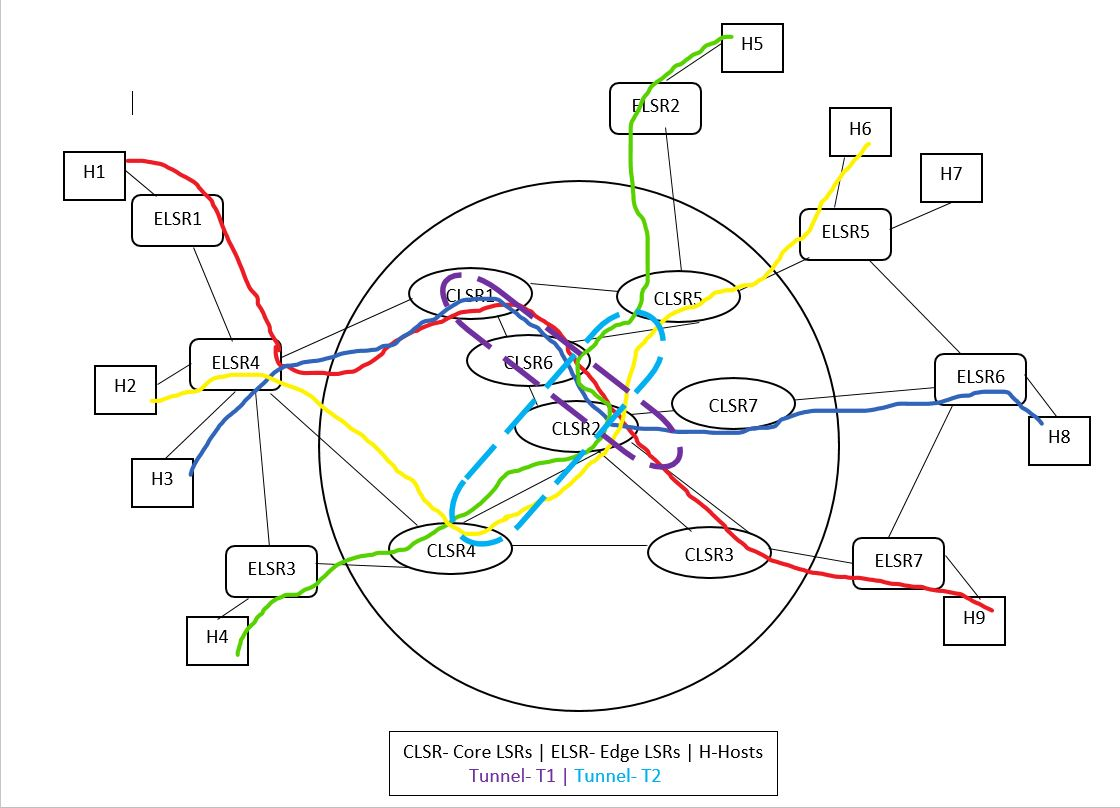

## Problem 5. MPLS Control Plane (20 pts)
Use *your* network from Homework #2 problem 3(d) or come up with a new network with similar properties.  You are going to illustrate the use of **LDP** to an undergraduate class. You will set up two LSPs from two different nodes to a common third node. You should pick these three nodes such that the paths from the first two nodes to the third will require at least two intermediate hops.

(a) Which tree should you base the paths on (minimum spanning tree, shortest path tree to the third node, widest path to the third one, or no tree is needed)?  Show a picture of your network with the two different paths highlighted.

(b) Show on the figure or a new figure the LDP messages that would be used to set up these paths at the level of detail shown in class and in the course notes.  Use an arbitrary IP destination FEC during requests and choose appropriate labels within the general rules of MPLS.




A.5a. Following is the image explaining concept of LSP in a network. Two differnent node AD2 and AD1 reach to common destination AD6. These paths are called LSPs. I based the paths using the shortest path tree. This is because if we choose widest path for the following above mentioned nodes, two distinct LSPs are not possible. Also, a spanning tree includes all nodes which is not the target. Hence, I chose shortest path tree to establish the paths from two different nodes to common destination nodes with more than two hops.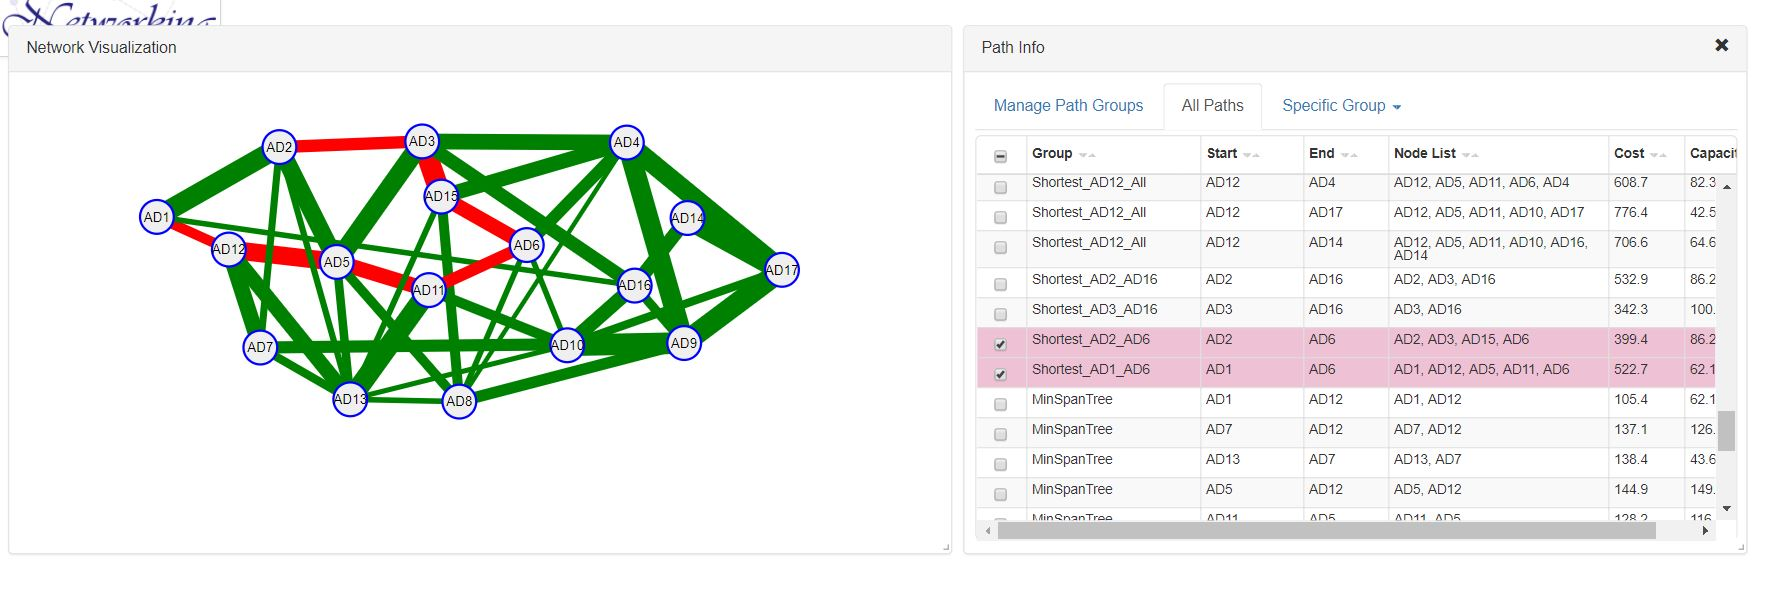

A.5b. Following chart help us understand the concept of LDP mesasges, forwarding Equivalence Class (FEC). LDP is  a protocol, distributing labels in MPLS enviornment. They associate FEC with each LSP created. LDP process imply works in following two steps: 1.LSR sends the Label Request message to LDP peer for FEC mapping request and 2.LSR sends a Label Mapping message to LDP peer for advertising FEC-label binding.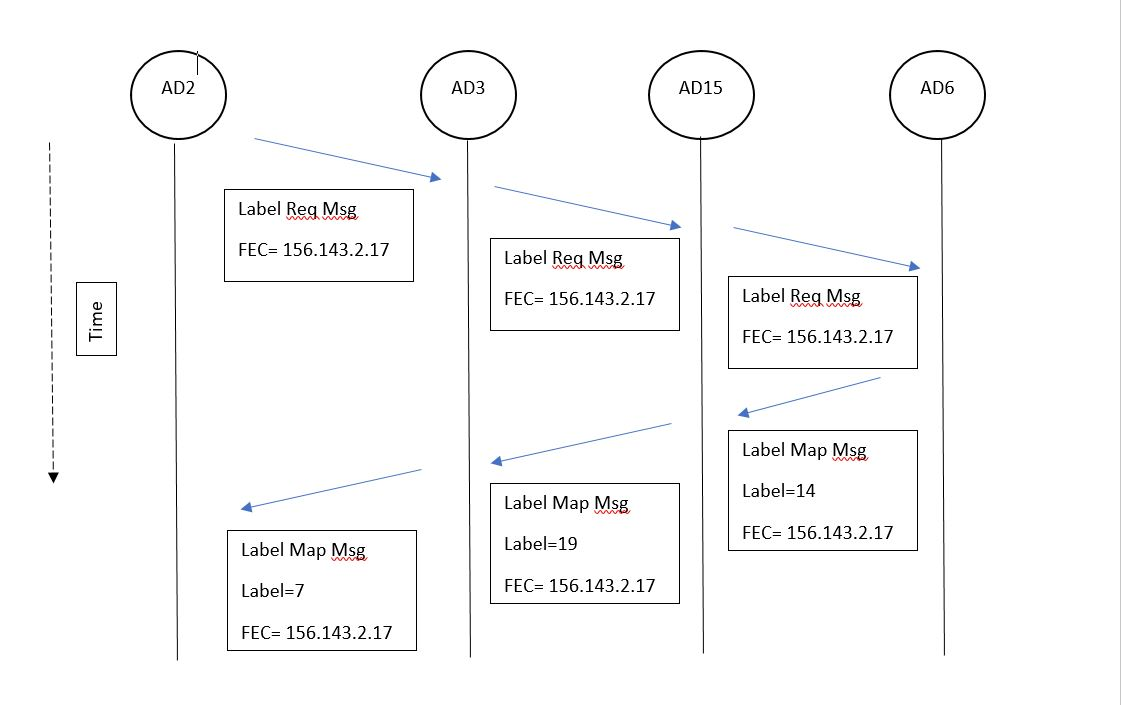